# Chapter 3 : Adding Layers

Sections:
- Training Data
- Dense Layer Class
- Full Code Up to this point

In [33]:
import numpy as np

In [34]:
# adding hidden layer

# input layer
inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

# hidden layer
weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

In [35]:
layer1_outputs = np.dot(np.array(inputs), np.array(weights).T) + biases

print(f"Layer 1 outputs: \n{layer1_outputs}")
print(f"Shape of layer 1 outputs: {layer1_outputs.shape}")

Layer 1 outputs: 
[[ 4.79999995  1.21000004  2.38499999]
 [ 8.9000001  -1.80999994  0.19999999]
 [ 1.41000003  1.051       0.02599999]]
Shape of layer 1 outputs: (3, 3)


In [36]:
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(f"Layer 2 outputs: \n{layer2_outputs}")
print(f"Shape of layer 2 outputs: {layer2_outputs.shape}")

Layer 2 outputs: 
[[ 0.50310004 -1.04184985 -2.03874993]
 [ 0.24339998 -2.73320007 -5.76329994]
 [-0.99314     1.41254002 -0.35655001]]
Shape of layer 2 outputs: (3, 3)


If you look all the values are getting less than there original values.

# Training Data

### Linear Data vs. Non-Linear Data

Linear Data:
- Data that can be represented by a straight line
- Can be represented by a linear equation
- Can be done with far simpler machine learning models

![sadfasdf](../references/linear_data.png)

Non-Linear Data:
![sadfasdf](../references/non_linear_data.png)
- Data that cannot be represented by a straight line
- Requires more complex machine learning models (deep learning models)

In [37]:
# NNFS library

#!pip3 install nnfs
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

In [38]:
# set seed for reproducibility
# sets float type to 32-bit
# overrides original dot product from numpy
nnfs.init()

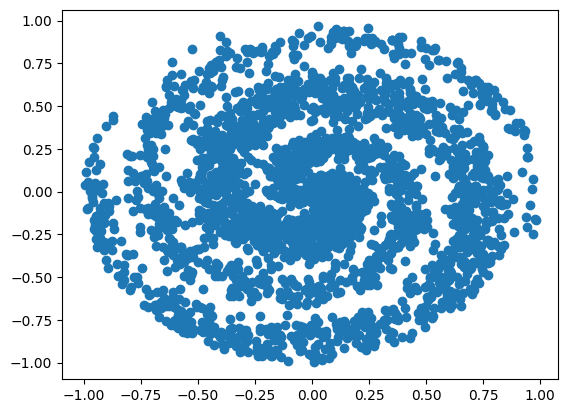

In [39]:
X, y = spiral_data(samples=1000, classes=3)

plt.scatter(X[:, 0], X[:,1])
plt.show()

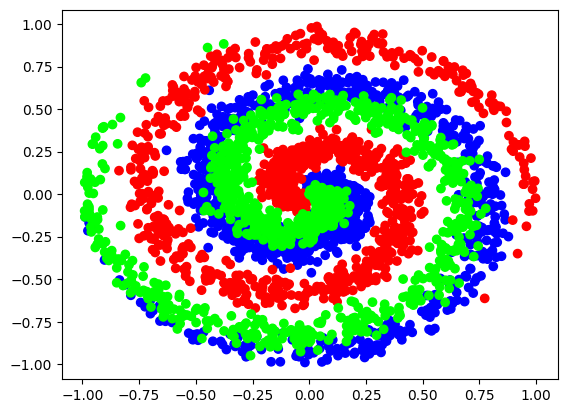

In [40]:
# add color to classes
X, y = spiral_data(samples=1000, classes=3)

plt.scatter(X[:, 0], X[:,1], c=y, cmap='brg')
plt.show()

# Dense Layer Class

In [42]:
# Dense Layer
class Layer_Dense:
    # Layer Initialization
    def __init__(self, n_inputs, n_neurons):
        # initialize weights and biases
        pass # placeholder
    # Forward Pass
    def forward(self, inputs):
        # calculate output values from inputs, weights, and biases
        pass # placeholder

### Adding Random Initialization

Setting weights to be (inputs, neurons) rather than (neurons, inputs) so we don't have to transpose the weights when multiplying them by the inputs.

In [49]:
class Layer_Dense:
    # Layer Initialization
    def __init__(self, n_inputs, n_neurons):
        # no need to transpose weights since flipped
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        print(f"weights: \n{self.weights}")
        self.biases = np.zeros((1, n_neurons))
        print(f"biases: \n{self.biases}")

    # Forward Pass
    def forward(self, inputs):
        # calculate output values from inputs, weights, and biases
        pass # placeholder

In [50]:
# Test
df = Layer_Dense(2, 3)

weights: 
[[-0.00664067 -0.00116287 -0.00416404]
 [-0.00210625  0.026118   -0.00817096]]
biases: 
[[0. 0. 0.]]


The weight initialization getting multiplied by 0.01 is to make the weights orders of magnitude smaller. This helps the model converge faster. 

### Example Initialization np.random.randn and np.zeros

#### np.random.randn

In [56]:
np_randn = np.random.randn(2, 3)
print(np_randn)

[[ 0.05731927 -0.7911548   1.5115075 ]
 [-0.42920393 -0.28149012 -0.2986505 ]]


#### np.zeros

In [54]:
np_zero = np.zeros((2, 3))

print(np_zero)

[[0. 0. 0.]
 [0. 0. 0.]]


In [57]:
# example

import numpy as np
import nnfs


nnfs.init()

n_inputs = 2
n_neurons = 4

weights = 0.01 * np.random.randn(n_inputs, n_neurons)
biases = np.zeros((1, n_neurons))

print(f"Weights : \n{weights}")
print(f"Biases : \n{biases}")

Weights : 
[[ 0.01764052  0.00400157  0.00978738  0.02240893]
 [ 0.01867558 -0.00977278  0.00950088 -0.00151357]]
Biases : 
[[0. 0. 0. 0.]]


In [68]:
# Adding to Forward Method

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [76]:
# calling class

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2,3)
dense1.forward(X)

print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-5.9332426e-05  2.7868335e-05  1.5241530e-04]
 [-1.0064979e-04  7.0963608e-05  2.8368243e-04]
 [-1.6889119e-04  9.1730864e-05  4.4701129e-04]
 [-1.6065384e-04  1.7099973e-04  5.1404606e-04]]


## Full Code Up to this point

In [77]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# dense layer
class dense_layer:

    # layer initialization
    def __init__(self, n_inputs, n_neurons):
        # initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # forward pass
    def forward(self, inputs):
        # calculate output values from inputs, weights, and biases 
        self.output = np.dot(inputs, self.weights) + self.biases

# create dataset
X, y = spiral_data(samples=100, classes=3)

# create dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2,3)

# perform forward pass of training data through this layer
dense1.forward(X)

# see output of first few samples
print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]
